In [1]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# Final report 

In [2]:
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import h5py
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import math 
import re 
import pandas as pd
import os
import glob


 
The report file is loaded from:

In [3]:
path = '/home/r1-user/.local/share/yarp/contexts/motionAnalyzer'
print path
files = glob.glob(os.path.join(path, '*.mat'))
lastfile = len(files)-1
file = files[lastfile]

f = h5py.File(file,'r')

/home/r1-user/.local/share/yarp/contexts/motionAnalyzer


In [4]:
tagkeypoints = []
tagkeypoints.append('shoulderCenter')
tagkeypoints.append('head')
tagkeypoints.append('shoulderLeft')
tagkeypoints.append('elbowLeft')
tagkeypoints.append('handLeft')
tagkeypoints.append('shoulderRight')
tagkeypoints.append('elbowRight')
tagkeypoints.append('handRight')
tagkeypoints.append('hipLeft')
tagkeypoints.append('kneeLeft')
tagkeypoints.append('ankleLeft')
tagkeypoints.append('hipRight')
tagkeypoints.append('kneeRight')
tagkeypoints.append('ankleRight') 

In [5]:
skeleton = namedtuple('skeleton', 
                      ['shoulderCenter','head','shoulderLeft','shoulderRight',
                      'elbowLeft','handLeft','elbowRight','handRight',
                      'hipLeft','hipRight','ankleLeft','ankleRight',
                      'kneeLeft','kneeRight'])

shoulderCenter = namedtuple('shoulderCenter', ['parent','child'])
head = namedtuple('head', ['parent','child'])
shoulderLeft = namedtuple('shoulderLeft', ['parent','child'])
shoulderRight = namedtuple('shoulderRight', ['parent','child'])
elbowLeft = namedtuple('elbowLeft', ['parent','child'])
handLeft = namedtuple('handLeft', ['parent','child'])
elbowRight = namedtuple('elbowRight', ['parent','child'])
handRight = namedtuple('handRight', ['parent','child'])
hipLeft = namedtuple('hipLeft', ['parent','child'])
hipRight = namedtuple('hipRight', ['parent','child'])
ankleLeft = namedtuple('ankleLeft', ['parent','child'])
ankleRight = namedtuple('ankleRight', ['parent','child'])
kneeLeft = namedtuple('kneeLeft', ['parent','child'])
kneeRight = namedtuple('kneeRight', ['parent','child'])

scSubst = shoulderCenter([''],['head','shoulderLeft','shoulderRight','hipLeft','hipRight'])
heSubst = head(['shoulderCenter'],[''])
slSubst = shoulderLeft(['shoulderCenter'],['elbowLeft'])
srSubst = shoulderRight(['shoulderCenter'],['elbowRight'])
elSubst = elbowLeft(['shoulderLeft'],['handLeft'])
hlSubst = handLeft(['elbowLeft'],[''])
erSubst = elbowRight(['shoulderRight'],['handRight'])
hrSubst = handRight(['elbowRight'],[''])
hilSubst = hipLeft(['shoulderCenter'],['kneeLeft'])
hirSubst = hipRight(['shoulderCenter'],['kneeRight'])
alSubst = ankleLeft(['kneeLeft'],[''])
arSubst = ankleRight(['kneeRight'],[''])
klSubst = kneeLeft(['hipLeft'],['ankleLeft'])
krSubst = kneeRight(['hipRight'],['ankleRight'])

skel = skeleton(scSubst,heSubst,slSubst,srSubst,elSubst,hlSubst,erSubst,
                  hrSubst,hilSubst,hirSubst,alSubst,arSubst,klSubst,krSubst) 

In [6]:
keypoints = namedtuple('keypoints', 
                      ['shoulderCenter','head','shoulderLeft','shoulderRight',
                      'elbowLeft','handLeft','elbowRight','handRight',
                      'hipLeft','hipRight','ankleLeft','ankleRight','kneeLeft','kneeRight'])

metric = namedtuple('ROM', ['motion_type','ref_joint','ref_direction','ref_plane','max','min','tstart','tend'])

time_hdf5 = f['Time_samples'][()]
time = np.transpose(time_hdf5)

#hdf5 dataset keypoints
shoulderCenter_hdf5 = f['Keypoints']['shoulderCenter']
head_hdf5 = f['Keypoints']['head']
shoulderLeft_hdf5 = f['Keypoints']['shoulderLeft']
shoulderRight_hdf5 = f['Keypoints']['shoulderRight']
elbowLeft_hdf5 = f['Keypoints']['elbowLeft']
elbowRight_hdf5 = f['Keypoints']['elbowRight']
handRight_hdf5 = f['Keypoints']['handRight']
hipLeft_hdf5 = f['Keypoints']['hipLeft']
hipRight_hdf5 = f['Keypoints']['hipRight']
ankleLeft_hdf5 = f['Keypoints']['ankleLeft']
ankleRight_hdf5 = f['Keypoints']['ankleRight']
kneeLeft_hdf5 = f['Keypoints']['kneeLeft']
kneeRight_hdf5 = f['Keypoints']['kneeRight']

motion_type_hdf5 = f['ROM']['motion_type']
refjoint_hdf5 = f['ROM']['ref_joint']
refdir_hdf5 = f['ROM']['ref_direction']
refplane_hdf5 = f['ROM']['ref_plane']
max_hdf5 = f['ROM']['max']
min_hdf5 = f['ROM']['min']
tstart_hdf5 = f['ROM']['tstart']
tend_hdf5 = f['ROM']['tend']

s = shoulderCenter_hdf5
shoulderCenter = np.transpose(s[()])
s = head_hdf5
head = np.transpose(s[()])
s = shoulderLeft_hdf5
shoulderLeft = np.transpose(s[()])
s = shoulderRight_hdf5
shoulderRight = np.transpose(s[()])
s = elbowLeft_hdf5
elbowLeft = np.transpose(s[()])   
s = elbowRight_hdf5
elbowRight = np.transpose(s[()])
s = handRight_hdf5
handRight = np.transpose(s[()])
s = hipLeft_hdf5
hipLeft = np.transpose(s[()])
s = hipRight_hdf5
hipRight = np.transpose(s[()])
s = ankleLeft_hdf5
ankleLeft = np.transpose(s[()])
s = ankleRight_hdf5
ankleRight = np.transpose(s[()])
s = kneeLeft_hdf5
kneeLeft = np.transpose(s[()]) 
s = kneeRight_hdf5
kneeRight = np.transpose(s[()])

m = motion_type_hdf5
motion_type = re.sub(r'[^\w]', '',(m[()]).tostring())
m = refjoint_hdf5
ref_joint = re.sub(r'[^\w]', '',(m[()]).tostring())
m = refdir_hdf5
ref_direction = np.transpose(m[()])
m = refplane_hdf5
ref_plane = np.transpose(m[()])
m = max_hdf5
maxv = np.transpose(m[()])
m = min_hdf5
minv = np.transpose(m[()])
m = tstart_hdf5
tstart = np.transpose(m[()])       
m = tend_hdf5
tend = np.transpose(m[()])

k = keypoints(shoulderCenter,head,shoulderLeft,shoulderRight,
    elbowLeft,handLeft,elbowRight,handRight,
    hipLeft,hipRight,ankleLeft,ankleRight,kneeLeft,kneeRight)
rom = metric(motion_type,ref_joint,ref_direction,ref_plane,maxv,minv,tstart,tend) 

 
The sessions is the following, along with the evaluated metric and joint:

In [7]:

data = []
data.append([type(rom).__name__, rom.ref_joint, rom.motion_type, np.asscalar(rom.tstart), np.asscalar(rom.tend)])        
pd.DataFrame(data, columns=["Metric", "Joint", "Motion type", "Time start", "Time end"]) 

,Metric,Joint,Motion type,Time start,Time end
0,ROM,shoulderRight,flexionx,74.941625,133.626675


In [8]:
#joint we want to evaluate in the current session
jnt = getattr(k,rom.ref_joint)
jsess = jnt

#direction wrt we want to evaluate the metric
dirsess = rom.ref_direction

#plane over which we want to evaluate the metric
planesess = rom.ref_plane

#joint child
jskel = getattr(skel,rom.ref_joint)
cld = jskel.child
childval = getattr(k,cld[0])
child = childval

#compute metric
x=jsess[:,0]
y=jsess[:,1]
z=jsess[:,2]

xchild=child[:,0]
ychild=child[:,1]
zchild=child[:,2]

v1x = x-xchild
v1y = y-ychild
v1z = z-zchild
v1=np.array([v1x,v1y,v1z])
v1=np.transpose(v1)

#project v1 on the right plane
dist = np.dot(v1,np.transpose(planesess))
v1 = v1-dist*planesess

cosRom = np.dot(v1,np.transpose(dirsess))
rom_value = np.arccos(cosRom)
result = rom_value *(180/math.pi)  

 
For each session, the metric over time has the following trend:

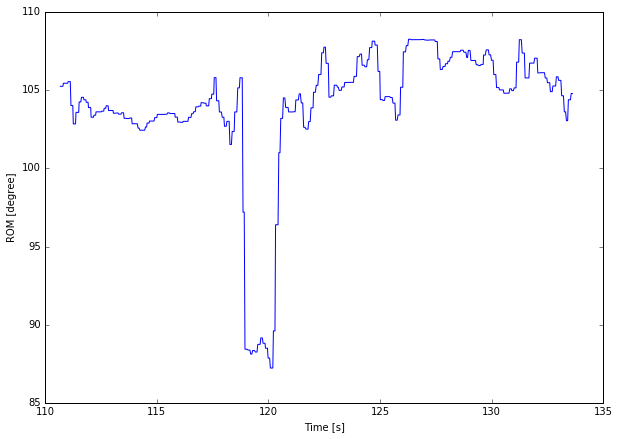

In [9]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.plot(time,result)
plt.xlabel('Time [s]')
plt.ylabel('ROM [degree]')    
plt.show() 